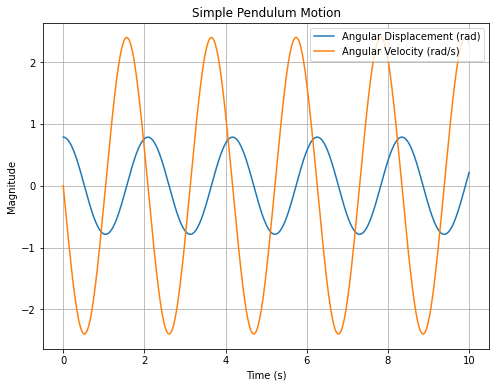

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def simple_pendulum(y, t, g, L):
    theta, omega = y
    dydt = [omega, -g/L * np.sin(theta)]
    return dydt

# Set initial conditions
theta0 = np.pi / 4  # initial angular displacement (radians)
omega0 = 0          # initial angular velocity (radians/s)

# Constants
g = 9.81  # acceleration due to gravity (m/s^2)
L = 1.0   # length of the pendulum (m)

# Time points for evaluation
t = np.linspace(0, 10, 1000)

# Solve the ODE
solution = odeint(simple_pendulum, [theta0, omega0], t, args=(g, L))

# Extracting angular displacement and velocity from the solution
theta = solution[:, 0]
omega = solution[:, 1]

# Plot the motion of the pendulum
plt.figure(figsize=(8, 6))
plt.plot(t, theta, label='Angular Displacement (rad)')
plt.plot(t, omega, label='Angular Velocity (rad/s)')
plt.title('Simple Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


{'kappa_tild': array([0.055, 0.014, 0.031, 0.03 ]), 'Tc_tild': array([[1.5e+01, 1.4e+03, 7.9e-01, 8.8e+00],
       [5.4e+00, 1.4e+03, 2.6e-01, 4.3e+00]]), 'Ta_tild': array([[ 200. ,  510. ,    5.7,   22. ],
       [ 150. , 1100. ,    3.9,   13. ]]), 'lambda_tild': array([[5.7e-01, 5.9e-03, 1.0e+01, 9.7e-01],
       [1.7e+00, 6.4e-03, 3.7e+01, 2.2e+00]]), 'Tr_tild': array([ 11,  11, 286, 238,  50, 189])}


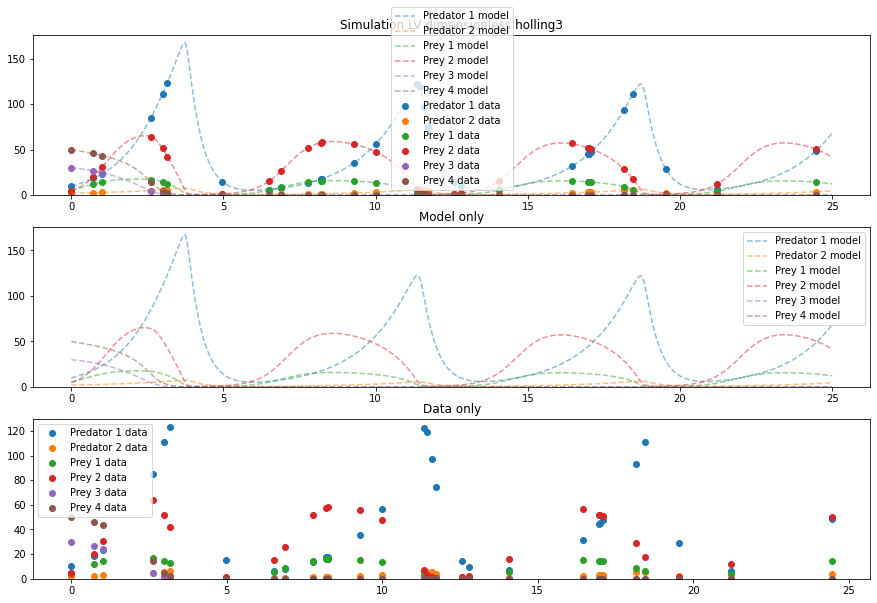

In [2]:
from models_and_data_gen_LV import data_gen_LVNpop_adim
import pickle
import matplotlib.pyplot as plt

with open('params_6pop_dimless.pickle', 'rb') as handle:
    params_6pop_dimless = pickle.load(handle)
 

func_rep = 'holling3'
if func_rep == "holling1" or func_rep == "holling1_sat":
    suff_hol = "H1"
elif func_rep == "holling2":
    suff_hol = "H2"
elif func_rep == "holling3":
    suff_hol = "H3"

dimless_params = {"kappa_tild": params_6pop_dimless["kappa_tild"],
                  "Tc_tild": params_6pop_dimless["Tc_tild_"+suff_hol],
                  "Ta_tild": params_6pop_dimless["Ta_tild_"+suff_hol],
                  "lambda_tild": params_6pop_dimless["lambda_tild_"+suff_hol],
                  "Tr_tild": params_6pop_dimless["Tr_tild"] }

print(dimless_params)

tmax = 25
X_tild_ini = [10, 2, 5, 5, 30, 50]

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
data = data_gen_LVNpop_adim(dimless_params, tmax, X_tild_ini, func_rep=func_rep, n_preds=2, n_preys=4, 
                            nbpoint=30, noise_intensity=.1, rd_seed=123, plot_data=True)
plt.subplot(3, 1, 2)
data.plot_initial_data(elements_to_plot=["model"], title="Model only")
plt.subplot(3, 1, 3)
data.plot_initial_data(elements_to_plot=["data"], title="Data only")

# data.export_data()

lambda_tild
[[5.7e-01 5.9e-03 1.0e+01 9.7e-01]
 [1.7e+00 6.4e-03 3.7e+01 2.2e+00]]
[[5.81114980e-01 3.19784330e-02 1.00026487e+01 1.19067846e+00]
 [1.69502134e+00 2.05055225e-02 3.69122072e+01 2.27013004e+00]]


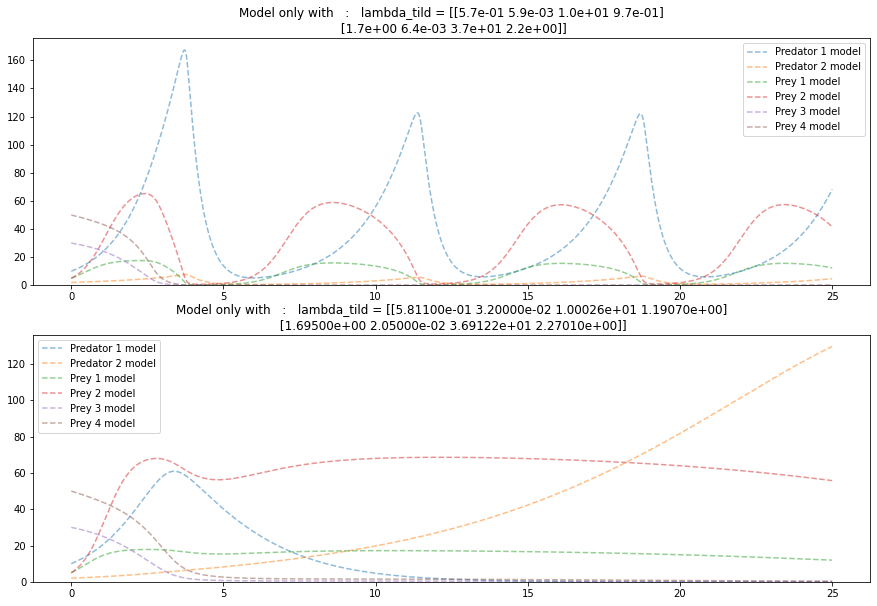

In [3]:
from models_and_data_gen_LV import data_gen_LVNpop_adim
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('params_6pop_dimless.pickle', 'rb') as handle:
    params_6pop_dimless = pickle.load(handle)
 

func_rep = 'holling3'
if func_rep == "holling1" or func_rep == "holling1_sat":
    suff_hol = "H1"
elif func_rep == "holling2":
    suff_hol = "H2"
elif func_rep == "holling3":
    suff_hol = "H3"

dimless_params = {"kappa_tild": params_6pop_dimless["kappa_tild"],
                  "Tc_tild": params_6pop_dimless["Tc_tild_"+suff_hol],
                  "Ta_tild": params_6pop_dimless["Ta_tild_"+suff_hol],
                  "lambda_tild": params_6pop_dimless["lambda_tild_"+suff_hol],
                  "Tr_tild": params_6pop_dimless["Tr_tild"] }

# par_name = "kappa_tild"
# par_name = "Tc_tild" # jours
# par_name = "Ta_tild" # jours
par_name = "lambda_tild"
# par_name = "Tr_tild" # jours
print(par_name)
print(dimless_params[par_name])
dimless_params_2 = dimless_params.copy()
dimless_params_2[par_name] = dimless_params[par_name] + np.random.normal(0, 0.1, size=dimless_params[par_name].shape)
print(dimless_params_2[par_name])

tmax = 25
X_tild_ini = [10, 2, 5, 5, 30, 50]

data = data_gen_LVNpop_adim(dimless_params, tmax, X_tild_ini, func_rep=func_rep, n_preds=2, n_preys=4, 
                            nbpoint=30, noise_intensity=.1, rd_seed=123, plot_data=False)
data_2 = data_gen_LVNpop_adim(dimless_params_2, tmax, X_tild_ini, func_rep=func_rep, n_preds=2, n_preys=4, 
                            nbpoint=30, noise_intensity=.1, rd_seed=123, plot_data=False)
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
data.plot_initial_data(elements_to_plot=["model"], title="Model only with   :   "+\
                       par_name+" = "+str(np.round(dimless_params[par_name], decimals=4)) )
plt.subplot(2, 1, 2)
data_2.plot_initial_data(elements_to_plot=["model"], title="Model only with   :   "+\
                         par_name+" = "+str(np.round(dimless_params_2[par_name], decimals=4)) )


# plt.figure(figsize=(15, 7))
# data = data_gen_LVNpop_adim(dimless_params, tmax, X_tild_ini, func_rep=func_rep, n_preds=2, n_preys=4, 
#                             nbpoint=30, noise_intensity=.1, rd_seed=123, plot_data=True)
# plt.figure(figsize=(15, 10))
# plt.subplot(2, 1, 1)
# data.plot_initial_data(elements_to_plot=["model"], title="Model only")
# plt.subplot(2, 1, 2)
# data.plot_initial_data(elements_to_plot=["data"], title="Data only")

# data.export_data()



In [4]:
import numpy as np
m = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8] ])
print(m)

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([.5, .5, .5, 2, 2, 2])

n_preds = 2
n_preys = 4
print(m[0,:].dot(x[n_preds:]))
print(m.dot(x[n_preds:])[0])

# square each coefficient of a vector
print(1/x)


[[1 2 3 4]
 [5 6 7 8]]
50
50
[1.         0.5        0.33333333 0.25       0.2        0.16666667]


In [5]:
[f"Predator {i+1} model" for i in range(3)]

['Predator 1 model', 'Predator 2 model', 'Predator 3 model']

In [6]:
"""
Prédateurs : Renards roux   |   Chats domestiques 
Proies : Oiseaux de moyenne et grande taille   |   Oiseaux de petite taille   |   Micromammifères   |   Lagomorphes
"""
params_6pop_dimless = {
    "kappa_tild": np.array([0.055 , 0.014 , 0.031 , 0.030]), # vector with n_preys elements

    "lambda_tild_H1": np.array([[0.19 , 0.0028 , 0.64 , 0.21], # row1=fox, row1=cat
                               [0.29 , 0.0023 , 0.59 , 0.43]]), # matrix with n_preds rows and n_preys columns
    "lambda_tild_H2": np.array([[0.30 , 0.0047 , 0.99 , 0.88],
                               [0.74 , 0.0059 , 0.13 , 1.1]]),
    "lambda_tild_H3": np.array([[0.57 , 0.0059 , 10 , 0.97],
                               [1.7 , 0.0064 , 37 , 2.2]]),

    "lambda_tild_autumn_H1": np.array([[0.34 , 0.0013 , 0.27 , 0.16], 
                                      [0.21 , 0 , 1.2 , 0.38]]), 
    "lambda_tild_winter_H1": np.array([[0.091 , 0.0013 , 0.58 , 0.13],
                                      [0.27 , 0.0031 , 0.44 , 0.29]]),
    "lambda_tild_spring_H1": np.array([[0.24 , 0.0031 , 1.4 , 0.062],
                                      [0.59 , 0.0039 , 0.41 , 0.54]]),
    "lambda_tild_summer_H1": np.array([[0.083 , 0.0051 , 0.18 , 0.47],
                                      [0.063 , 0.0021 , 0.22 , 0.47]]),
    "lambda_tild_autumn_H2": np.array([[0.57 , 0.0022 , 0.42 , 0.26],
                                      [0.66 , 0 , 3.0 , 0.97]]),
    "lambda_tild_winter_H2": np.array([[0.14 , 0.0018 , 0.91 , 0.15],
                                      [0.60 , 0.0067 , 0.58 , 0.61]]),
    "lambda_tild_spring_H2": np.array([[0.35 , 0.0044 , 1.96 , 0.094],
                                      [1.5 , 0.012 , 1.2 , 1.6]]),
    "lambda_tild_summer_H2": np.array([[0.11 , 0.011 , 0.46 , 0.086],
                                      [0.17 , 0.0047 , 0.54 , 1.2]]),
    "lambda_tild_autumn_H3": np.array([[0.84 , 0.0014 , 13 , 0.34],
                                      [1.1 , 0 , 1.3e2 , 1.2]]),
    "lambda_tild_winter_H3": np.array([[0.21 , 0.0018 , 5.5 , 0.26],
                                      [0.79 , 0.0067 , 3.6 , 0.88]]),
    "lambda_tild_spring_H3": np.array([[1.1 , 0.0045 , 21 , 0.13],
                                      [5.0 , 0.012 , 14 , 2.6]]),
    "lambda_tild_summer_H3": np.array([[0.045 , 0.015 , 1.8 , 3.1],
                                      [0.073 , 0.0069 , 2.4 , 3.9]]),

    "Tr_tild": np.array([11 , 11 , 286 , 238 , 50 , 189]), # vector with n_preds + n_preys elements
    "Tr_tild_autumn": np.array([11 , 11]),
    "Tr_tild_winter": np.array([11 , 11]),
    "Tr_tild_spring": np.array([11 , 11]),
    "Tr_tild_summer": np.array([12 , 11]),

    "Tc_tild_H1": np.array([[44 , 3.1e3 , 13 , 41],
                           [33 , 4.1e3 , 16 , 22]]), # matrix with n_preds rows and n_preys columns
    "Tc_tild_H2": np.array([[28 , 1.8e3 , 8.8 , 23],
                           [13 , 1.6e3 , 72 , 8.3]]),
    "Tc_tild_H3": np.array([[15 , 1.4e3 , 0.79 , 8.8],
                           [5.4 , 1.4e3 , 0.26 , 4.3]]),
    "Tc_tild_autumn_H1": np.array([[25 , 6.7e3 , 33 , 53],
                                  [44 , np.nan , 7.6 , 25]]),
    "Tc_tild_winter_H1": np.array([[86 , 5.9e3 , 14 , 59],
                                  [34 , 3.0e3 , 22 , 31]]),
    "Tc_tild_spring_H1": np.array([[33 , 2.5e3 , 5.7 , 1.3e2],
                                  [16 , 2.4e3 , 23 , 17]]),
    "Tc_tild_summer_H1": np.array([[1.0e2 , 1.7e3 , 48 , 18],
                                  [1.5e2 , 4.5e3 , 42 , 20]]),
    "Tc_tild_autumn_H2": np.array([[15 , 3.9e3 , 20 , 33],
                                  [14 , np.nan , 3.2 , 9.6]]),
    "Tc_tild_winter_H2": np.array([[56 , 4.3e3 , 8.8 , 51],
                                  [15 , 1.4e3 , 16 , 15]]),
    "Tc_tild_spring_H2": np.array([[22 , 1.8e3 , 4.1 , 91],
                                  [6.2 , 7.6e2 , 7.6 , 5.7]]),
    "Tc_tild_summer_H2": np.array([[79 , 8.1e2 , 19 , 9.6],
                                  [56 , 2.0e3 , 18 , 7.8]]),
    "Tc_tild_autumn_H3": np.array([[10 , 6.1e3 , 0.66 , 25],
                                  [8.5 , np.nan , 0.074 , 7.7]]),
    "Tc_tild_winter_H3": np.array([[37 , 4.3e3 , 1.4 , 30],
                                  [12 , 1.4e3 , 2.6 , 10]]),
    "Tc_tild_spring_H3": np.array([[7.4 , 1.8e3 , 0.38 , 61],
                                  [1.9 , 7.8e2 , 0.66 , 3.6]]),
    "Tc_tild_summer_H3": np.array([[1.9e2 , 5.5e2 , 4.3 , 2.7],
                                  [1.3e2 , 1.3e3 , 3.9 , 2.4]]),

    "Ta_tild_H1": np.array([[6.0e2 , 1.1e3 , 98 , 1.0e2],
                           [9.2e2 , 3.1e3 , 2.5e2 , 67]]), # matrix with n_preds rows and n_preys columns
    "Ta_tild_H2": np.array([[3.8e2 , 6.4e2 , 64 , 60],
                           [3.6e2 , 1.2e3 , 1.1e3 , 26]]),
    "Ta_tild_H3": np.array([[2.0e2 , 5.1e2 , 5.7 , 22],
                           [1.5e2 , 1.1e3 , 3.9 , 13]]),
    "Ta_tild_autumn_H1": np.array([[3.3e2 , 2.4e3 , 2.4e2 , 1.3e2],
                                  [1.3e3 , np.nan , 1.2e2 , 76]]),
    "Ta_tild_winter_H1": np.array([[1.2e3 , 2.0e3 , 1.0e2 , 1.5e2],
                                  [9.7e2 , 2.2e3 , 3.3e2 , 97]]),
    "Ta_tild_spring_H1": np.array([[4.4e2 , 9.0e2 , 42 , 3.2e2],
                                  [4.5e2 , 1.8e3 , 3.5e2 , 53]]),
    "Ta_tild_summer_H1": np.array([[1.4e3 , 6.0e2 , 3.5e2 , 46],
                                  [4.2e3 , 3.4e3 , 6.5e2 , 60]]),
    "Ta_tild_autumn_H2": np.array([[2.0e2 , 1.4e3 , 1.5e2 , 83],
                                  [4.0e2 , np.nan , 49 , 30]]),
    "Ta_tild_winter_H2": np.array([[7.6e2 , 1.5e3 , 64 , 1.3e2],
                                  [4.4e2 , 1.0e3 , 2.5e2 , 47]]),
    "Ta_tild_spring_H2": np.array([[3.0e2 , 6.4e2 , 30 , 2.3e2],
                                  [1.8e2 , 5.7e2 , 1.2e2 , 18]]),
    "Ta_tild_summer_H2": np.array([[1.1e3 , 2.9e2 , 1.4e2 , 25],
                                  [1.6e3 , 1.5e3 , 2.7e2 , 24]]),
    "Ta_tild_autumn_H3": np.array([[1.4e2 , 2.2e3 , 4.8 , 63],
                                  [2.4e2 , np.nan , 1.1 , 24]]),
    "Ta_tild_winter_H3": np.array([[5.0e2 , 1.5e3 , 11 , 77],
                                  [3.3e2 , 1.0e3 , 40 , 32]]),
    "Ta_tild_spring_H3": np.array([[1.0e2 , 6.2e2 , 2.8 , 1.5e2],
                                  [53 , 5.8e2 , 10 , 11]]),
    "Ta_tild_summer_H3": np.array([[2.5e3 , 2.0e2 , 32 , 6.9],
                                  [3.6e3 , 1.0e3 , 60 , 7.3]]),
                                          

}


In [7]:
# # save the dictionary params_6pop_dimless
# import pickle
# with open('params_6pop_dimless.pickle', 'wb') as f:
#     pickle.dump(params_6pop_dimless, f, pickle.HIGHEST_PROTOCOL)